In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np 
import pickle

In [3]:
data = pd.read_csv(r'C:\Users\Ajith R\Downloads\Covid Data.csv\Covid Data.csv')

In [4]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
USMER,1048575.0,1.632194,0.482208,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,1048575.0,8.980565,3.723278,1.0,4.0,12.0,12.0,13.0
SEX,1048575.0,1.499259,0.500000,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1048575.0,1.190765,0.392904,1.0,1.0,1.0,1.0,2.0
INTUBED,1048575.0,79.522875,36.868886,1.0,97.0,97.0,97.0,99.0
PNEUMONIA,1048575.0,3.346831,11.912881,1.0,2.0,2.0,2.0,99.0
AGE,1048575.0,41.794102,16.907389,0.0,30.0,40.0,53.0,121.0
PREGNANT,1048575.0,49.765585,47.510733,1.0,2.0,97.0,97.0,98.0
DIABETES,1048575.0,2.186404,5.424242,1.0,2.0,2.0,2.0,98.0
COPD,1048575.0,2.260569,5.132258,1.0,2.0,2.0,2.0,98.0


In [7]:

data[data.duplicated(keep=False)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
19,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
22,2,1,2,1,9999-99-99,97,2,45,97,2,...,2,2,2,2,2,2,2,2,3,97
35,2,1,2,1,9999-99-99,97,2,45,97,2,...,2,2,2,2,2,2,2,2,3,97
49,2,1,1,1,9999-99-99,97,2,30,2,2,...,2,2,2,2,2,2,2,2,7,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048556,2,13,2,1,9999-99-99,97,2,31,97,2,...,2,2,2,2,2,2,2,2,7,97
1048558,1,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048566,2,13,2,1,9999-99-99,97,2,24,97,2,...,1,2,2,2,2,2,2,2,7,97
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97


In [8]:
data.drop_duplicates(keep='first', inplace=True)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236526 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   USMER                 236526 non-null  int64 
 1   MEDICAL_UNIT          236526 non-null  int64 
 2   SEX                   236526 non-null  int64 
 3   PATIENT_TYPE          236526 non-null  int64 
 4   DATE_DIED             236526 non-null  object
 5   INTUBED               236526 non-null  int64 
 6   PNEUMONIA             236526 non-null  int64 
 7   AGE                   236526 non-null  int64 
 8   PREGNANT              236526 non-null  int64 
 9   DIABETES              236526 non-null  int64 
 10  COPD                  236526 non-null  int64 
 11  ASTHMA                236526 non-null  int64 
 12  INMSUPR               236526 non-null  int64 
 13  HIPERTENSION          236526 non-null  int64 
 14  OTHER_DISEASE         236526 non-null  int64 
 15  CARDIOVASCULAR  

In [10]:
data.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

In [11]:
data['Death'] = np.where(data['DATE_DIED'] == '9999-99-99' ,2,1)


In [12]:
data['Death'].value_counts()

2    160561
1     75965
Name: Death, dtype: int64

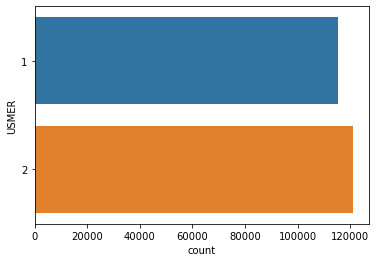

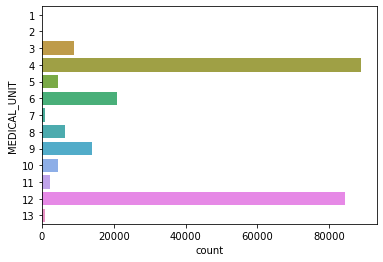

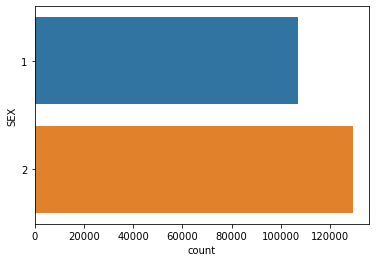

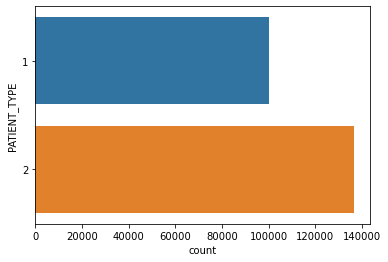

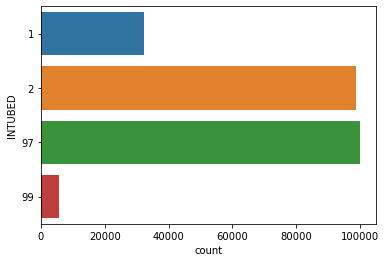

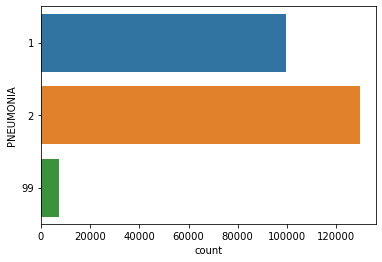

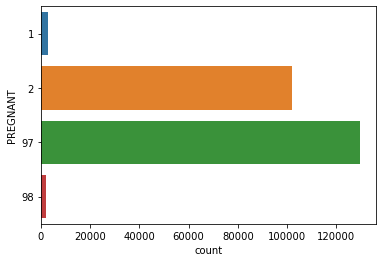

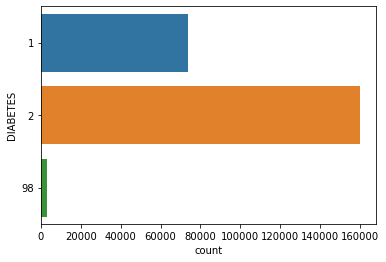

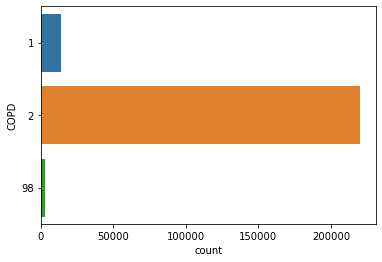

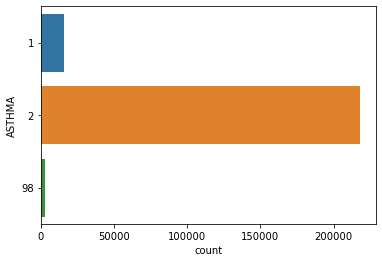

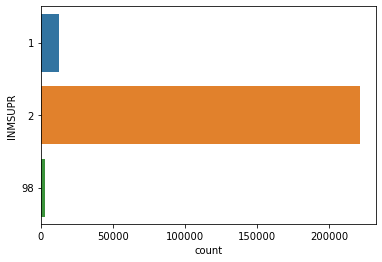

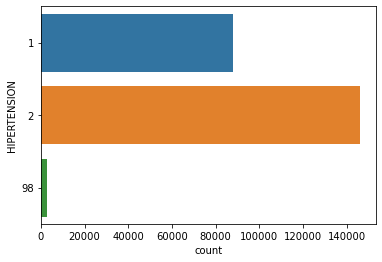

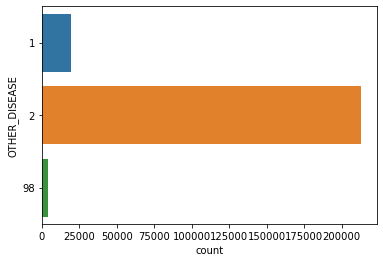

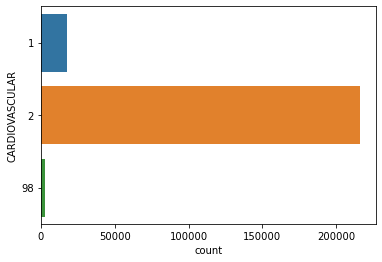

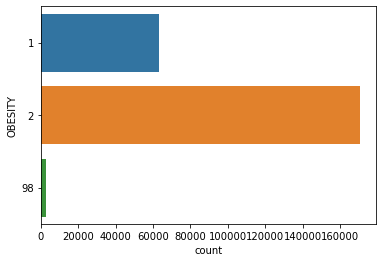

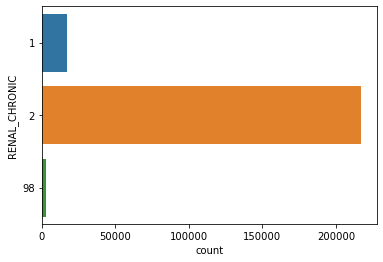

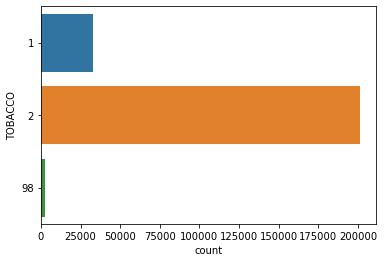

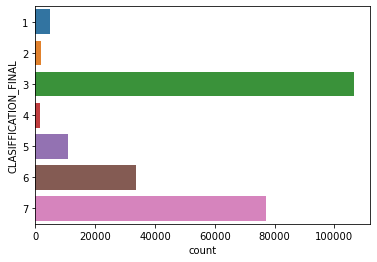

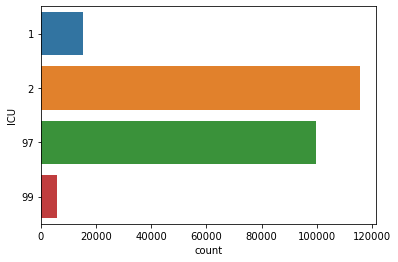

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in data.select_dtypes(include='int64'):
    if data[col].nunique() <= 14:
        sns.countplot(y=col, data=data)
        plt.show()

In [14]:
list1 = [97,98,99]

In [15]:
list2 = data.columns[data.isin(list1).any()]

In [16]:
list2

Index(['INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA',
       'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'ICU'],
      dtype='object')

In [17]:
data.groupby('SEX')['PREGNANT'].value_counts()

SEX  PREGNANT
1    2           102049
     1             3020
     98            1954
2    97          129503
Name: PREGNANT, dtype: int64

In [18]:
data['PREGNANT'] = data['PREGNANT'].replace(97,2)
data['PREGNANT'] = data['PREGNANT'].replace(98,2)

In [19]:
data.groupby('SEX')['PREGNANT'].value_counts()

SEX  PREGNANT
1    2           104003
     1             3020
2    2           129503
Name: PREGNANT, dtype: int64

In [20]:
for i in range(0,len(list2)):
  print(list2[i])
  data[list2[i]] = np.where((data[list2[i]] == 99) |(data[list2[i]] == 98) |(data[list2[i]] == 97),np.nan,data[list2[i]])
  print(data[list2[i]].value_counts())


INTUBED
2.0    98844
1.0    32295
Name: INTUBED, dtype: int64
PNEUMONIA
2.0    129609
1.0     99730
Name: PNEUMONIA, dtype: int64
AGE
56.0     5047
60.0     4909
59.0     4878
57.0     4854
55.0     4802
         ... 
118.0       2
115.0       2
111.0       1
121.0       1
113.0       1
Name: AGE, Length: 118, dtype: int64
PREGNANT
2.0    233506
1.0      3020
Name: PREGNANT, dtype: int64
DIABETES
2.0    159930
1.0     73756
Name: DIABETES, dtype: int64
COPD
2.0    219928
1.0     14069
Name: COPD, dtype: int64
ASTHMA
2.0    217984
1.0     16036
Name: ASTHMA, dtype: int64
INMSUPR
2.0    221310
1.0     12290
Name: INMSUPR, dtype: int64
HIPERTENSION
2.0    145901
1.0     88005
Name: HIPERTENSION, dtype: int64
OTHER_DISEASE
2.0    212584
1.0     19580
Name: OTHER_DISEASE, dtype: int64
CARDIOVASCULAR
2.0    216012
1.0     17911
Name: CARDIOVASCULAR, dtype: int64
OBESITY
2.0    170644
1.0     63328
Name: OBESITY, dtype: int64
RENAL_CHRONIC
2.0    216891
1.0     17104
Name: RENAL_CHRONIC, dtyp

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236526 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 236526 non-null  int64  
 1   MEDICAL_UNIT          236526 non-null  int64  
 2   SEX                   236526 non-null  int64  
 3   PATIENT_TYPE          236526 non-null  int64  
 4   DATE_DIED             236526 non-null  object 
 5   INTUBED               131139 non-null  float64
 6   PNEUMONIA             229339 non-null  float64
 7   AGE                   236218 non-null  float64
 8   PREGNANT              236526 non-null  float64
 9   DIABETES              233686 non-null  float64
 10  COPD                  233997 non-null  float64
 11  ASTHMA                234020 non-null  float64
 12  INMSUPR               233600 non-null  float64
 13  HIPERTENSION          233906 non-null  float64
 14  OTHER_DISEASE         232164 non-null  float64
 15 

In [22]:
s = []
for i in range(0,len(list2)):
    da = data[list2[i]].isnull().sum()
    q = da/len(data)*100
    if q < 5:
      print(list2[i])
      s.append(list2[i])
    print(q)


44.55620100961416
PNEUMONIA
3.0385665846460856
AGE
0.13021824239195692
PREGNANT
0.0
DIABETES
1.2007136636141482
COPD
1.0692270617183735
ASTHMA
1.0595029721891038
INMSUPR
1.2370733027235907
HIPERTENSION
1.1077006333341788
OTHER_DISEASE
1.8441947185510261
CARDIOVASCULAR
1.100513262812545
OBESITY
1.0797967242501882
RENAL_CHRONIC
1.0700726347209186
TOBACCO
1.157589440484344
44.619196198303776


In [23]:
type(s)

list

In [24]:
data[s]=data[s].fillna(data.mode().iloc[0])

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236526 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 236526 non-null  int64  
 1   MEDICAL_UNIT          236526 non-null  int64  
 2   SEX                   236526 non-null  int64  
 3   PATIENT_TYPE          236526 non-null  int64  
 4   DATE_DIED             236526 non-null  object 
 5   INTUBED               131139 non-null  float64
 6   PNEUMONIA             236526 non-null  float64
 7   AGE                   236526 non-null  float64
 8   PREGNANT              236526 non-null  float64
 9   DIABETES              236526 non-null  float64
 10  COPD                  236526 non-null  float64
 11  ASTHMA                236526 non-null  float64
 12  INMSUPR               236526 non-null  float64
 13  HIPERTENSION          236526 non-null  float64
 14  OTHER_DISEASE         236526 non-null  float64
 15 

In [26]:
# for i in range(0,len(s)):
#     print(data[s[i]].value_counts())
#     print(s[i])
#     data.loc[data['s[i]'] == '?',['s[i]']] = data['s[i]'].mode()
#     print(data[s[i]].value_counts())  
        

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236526 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 236526 non-null  int64  
 1   MEDICAL_UNIT          236526 non-null  int64  
 2   SEX                   236526 non-null  int64  
 3   PATIENT_TYPE          236526 non-null  int64  
 4   DATE_DIED             236526 non-null  object 
 5   INTUBED               131139 non-null  float64
 6   PNEUMONIA             236526 non-null  float64
 7   AGE                   236526 non-null  float64
 8   PREGNANT              236526 non-null  float64
 9   DIABETES              236526 non-null  float64
 10  COPD                  236526 non-null  float64
 11  ASTHMA                236526 non-null  float64
 12  INMSUPR               236526 non-null  float64
 13  HIPERTENSION          236526 non-null  float64
 14  OTHER_DISEASE         236526 non-null  float64
 15 

In [28]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 14:
        sns.countplot(y=col, data=data)
        plt.show()

In [29]:
list2

Index(['INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA',
       'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'ICU'],
      dtype='object')

In [30]:
s

['PNEUMONIA',
 'AGE',
 'PREGNANT',
 'DIABETES',
 'COPD',
 'ASTHMA',
 'INMSUPR',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENAL_CHRONIC',
 'TOBACCO']

In [31]:
# data[['INTUBED','PREGNANT','ICU']].apply(pd.Series.value_counts)

# data['INTUBED'].value_counts(normalize = True)
# data['PREGNANT'].value_counts(normalize = True)
# data['ICU'].value_counts(normalize = True)

In [32]:
data.drop(['ICU','INTUBED','DATE_DIED'],axis = 1,inplace = True)

In [33]:
data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
Death                   0
dtype: int64

Text(0.5, 1.0, 'Age by Death, Covid')

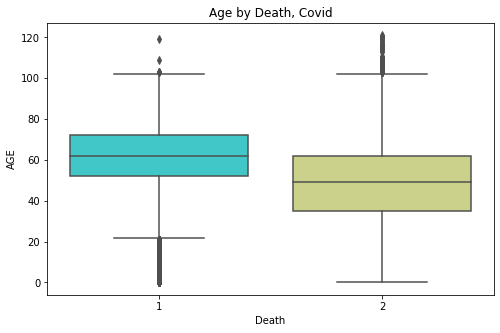

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Death',y='AGE',data=data, palette='rainbow')
plt.title("Age by Death, Covid")

<AxesSubplot:xlabel='Death', ylabel='count'>

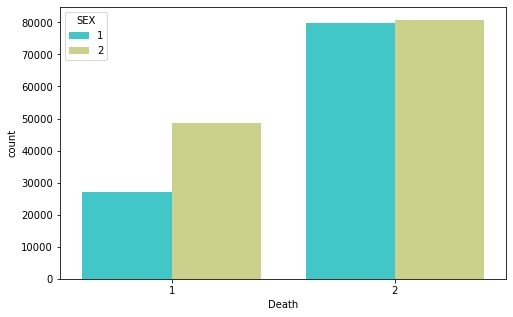

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(x='Death',data=data, palette='rainbow',hue='SEX')


In [36]:
# plt.figure(figsize=(8,5))
# sns.barplot(x='embark_town',y='fare',data=titanic, palette='rainbow', hue='class')


In [37]:
data.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
PNEUMONIA                 2
AGE                     118
PREGNANT                  2
DIABETES                  2
COPD                      2
ASTHMA                    2
INMSUPR                   2
HIPERTENSION              2
OTHER_DISEASE             2
CARDIOVASCULAR            2
OBESITY                   2
RENAL_CHRONIC             2
TOBACCO                   2
CLASIFFICATION_FINAL      7
Death                     2
dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236526 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 236526 non-null  int64  
 1   MEDICAL_UNIT          236526 non-null  int64  
 2   SEX                   236526 non-null  int64  
 3   PATIENT_TYPE          236526 non-null  int64  
 4   PNEUMONIA             236526 non-null  float64
 5   AGE                   236526 non-null  float64
 6   PREGNANT              236526 non-null  float64
 7   DIABETES              236526 non-null  float64
 8   COPD                  236526 non-null  float64
 9   ASTHMA                236526 non-null  float64
 10  INMSUPR               236526 non-null  float64
 11  HIPERTENSION          236526 non-null  float64
 12  OTHER_DISEASE         236526 non-null  float64
 13  CARDIOVASCULAR        236526 non-null  float64
 14  OBESITY               236526 non-null  float64
 15 

In [39]:
a = data.columns

In [40]:
cat_col = ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA',
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL']

In [41]:
data[cat_col]=data[cat_col].astype('object')

In [42]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
data['AGE'] = standard_scaler.fit_transform(data.loc[:,['AGE']])

In [ ]:
import pickle 
pickle.dump(standard_scaler,open('scaling.pkl','wb'))

In [43]:
y = data['Death']
x = data.drop('Death', axis=1)

In [44]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)


In [45]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)
print("Logistic Regression Accuracy :", log_reg.score(test_x, test_y))

C:\Users\Ajith R\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy : 0.7911681393480743


In [46]:
print('Train X :', train_x.shape)
print('Test X :', test_x.shape)
print('Train Y :', train_y.shape)
print('Test Y :', test_y .shape)

Train X : (189220, 18)
Test X : (47306, 18)
Train Y : (189220,)
Test Y : (47306,)


In [47]:
from sklearn.metrics import f1_score

print("Logistic Regression F1 Score : ", f1_score(test_y, log_reg.predict(test_x),average=None))

Logistic Regression F1 Score :  [0.66767585 0.84774601]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

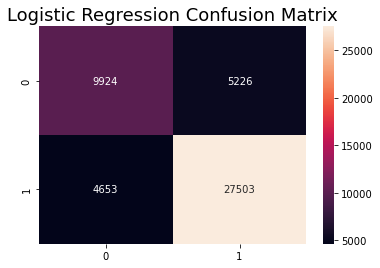

In [48]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_y, log_reg.predict(test_x)), annot=True, fmt='.0f')
plt.title("Logistic Regression Confusion Matrix", fontsize=18)

Text(0.5, 1.0, 'Death Distribution')

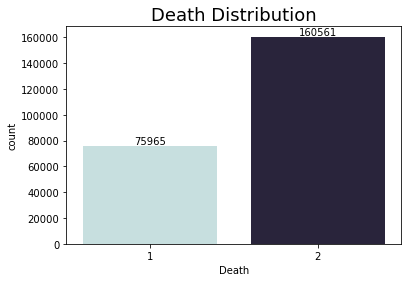

In [49]:
ax = sns.countplot(x=data['Death'],palette='ch:start=.2,rot=-.3')
plt.bar_label(ax.containers[0])
plt.title('Death Distribution', fontsize=18)

In [50]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x, train_y)

RandomForestClassifier()

In [51]:
from sklearn.metrics import accuracy_score

print('Random Forest Accuracy Score :', accuracy_score(test_y,random_forest.predict(test_x)))

Random Forest Accuracy Score : 0.7725024309812709


In [54]:
pickle.dump(log_reg,open('covid_model_LR.pkl','wb'))

In [55]:
pickled_model_LR = pickle.load(open('covid_model_LR.pkl','rb'))